In [199]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder 


In [200]:
#import data
data = pd.read_csv("C:\\Users\\Kasutaja\\Downloads\\loan.csv")
data.head(2)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False


In [201]:
data.shape

(5000, 17)

In [202]:
data.isnull().all()

customer_id          False
loan_id              False
loan_type            False
loan_amount          False
interest_rate        False
loan_term            False
employment_type      False
income_level         False
credit_score         False
gender               False
marital_status       False
education_level      False
application_date     False
approval_date        False
disbursement_date    False
due_date             False
default_status       False
dtype: bool

In [203]:
data.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [204]:
#-----------------Data Exploratory-------------------------------------------


In [205]:
data.duplicated().sum()*100/len(data)

0.0

In [206]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [207]:
pd.crosstab(data['credit_score'],data['default_status'],margins = True)

default_status,False,True,All
credit_score,,,
300,10,2,12
301,5,4,9
302,6,1,7
303,5,3,8
304,7,3,10
...,...,...,...
846,6,1,7
847,6,1,7
848,12,2,14


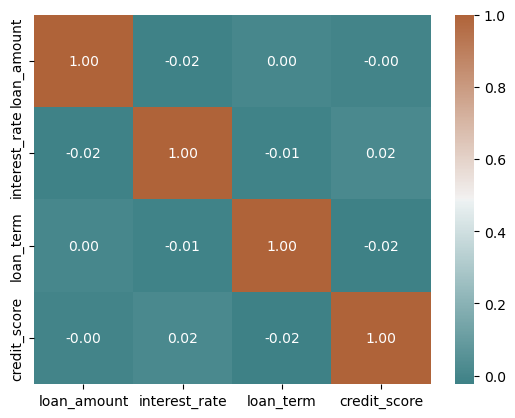

In [208]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(3800, 30, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

In [209]:
data.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [210]:
#preparing data for prediction
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column FOR PREDICTION 
data['default_status']= label_encoder.fit_transform(data['default_status']) 
data['employment_type']= label_encoder.fit_transform(data['employment_type']) 
data['income_level']= label_encoder.fit_transform(data['income_level']) 
data['marital_status']= label_encoder.fit_transform(data['marital_status']) 
data['education_level']= label_encoder.fit_transform(data['education_level']) 


In [211]:
X_support = data[[ 'credit_score', 'employment_type',
       'income_level','education_level','marital_status']]

Y_support = data['default_status']


In [212]:
Y_support

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    1
4998    0
4999    0
Name: default_status, Length: 5000, dtype: int64

In [213]:
#  Split the model into test and training data

X_train, X_test, y_train, y_test = train_test_split(X_support, Y_support, test_size=0.2)

In [214]:
# Create the model with specified parameters

#Create a svm Classifier
clf = svm.SVC(kernel='sigmoid') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [215]:
y_test

244     0
324     0
2759    0
3983    0
425     0
       ..
4614    0
4546    0
1291    0
4413    0
140     0
Name: default_status, Length: 1000, dtype: int64

In [216]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.693
Precision: 0.16759776536312848
Recall: 0.1595744680851064


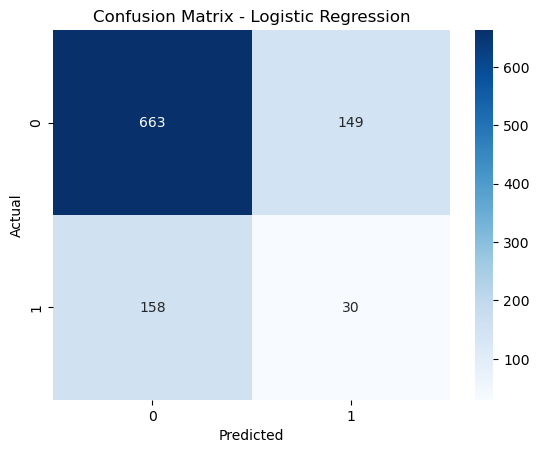

In [217]:
# ---------Confusion Matrix Visualization----------------

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()